Converged at iteration 5


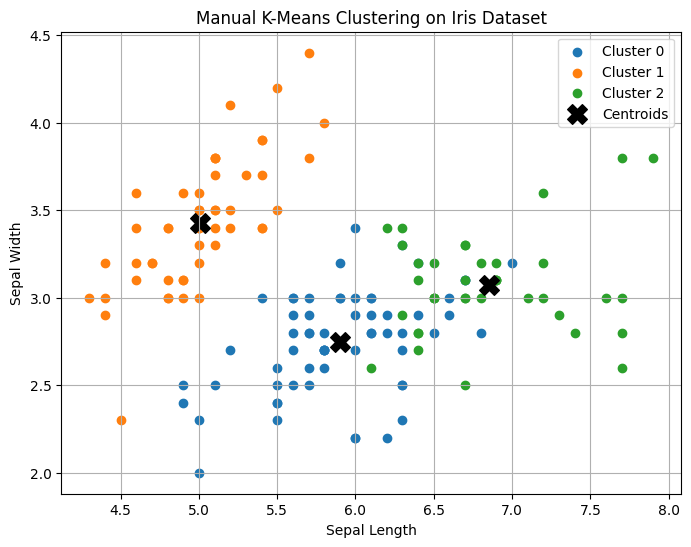

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def manual_kmeans(X, k=3, max_iters=100, tol=1e-4):
    np.random.seed(42)
    # Step 1: Randomly initialize centroids
    random_indices = np.random.choice(len(X), k, replace=False)
    centroids = X[random_indices]

    for iteration in range(max_iters):
        # Step 2: Assign clusters
        labels = np.zeros(len(X), dtype=int)
        for i, point in enumerate(X):
            distances = euclidean_distance(point, centroids)
            labels[i] = np.argmin(distances)

        # Step 3: Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Step 4: Check convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Converged at iteration {iteration}")
            break

        centroids = new_centroids

    return labels, centroids

# Load data
iris = load_iris()
X = iris.data  # shape: (150, 4)

# Apply manual KMeans
k = 3
labels, centroids = manual_kmeans(X, k=k)

# Plot (using first two features)
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Manual K-Means Clustering on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Count number of points in each cluster
unique, counts = np.unique(labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"Cluster {cluster_id}: {count} points")


Cluster 0: 62 points
Cluster 1: 50 points
Cluster 2: 38 points



Train Cluster Counts:
  Cluster 0: 31 points
  Cluster 1: 29 points
  Cluster 2: 45 points

Test Cluster Counts:
  Cluster 0: 19 points
  Cluster 1: 10 points
  Cluster 2: 16 points


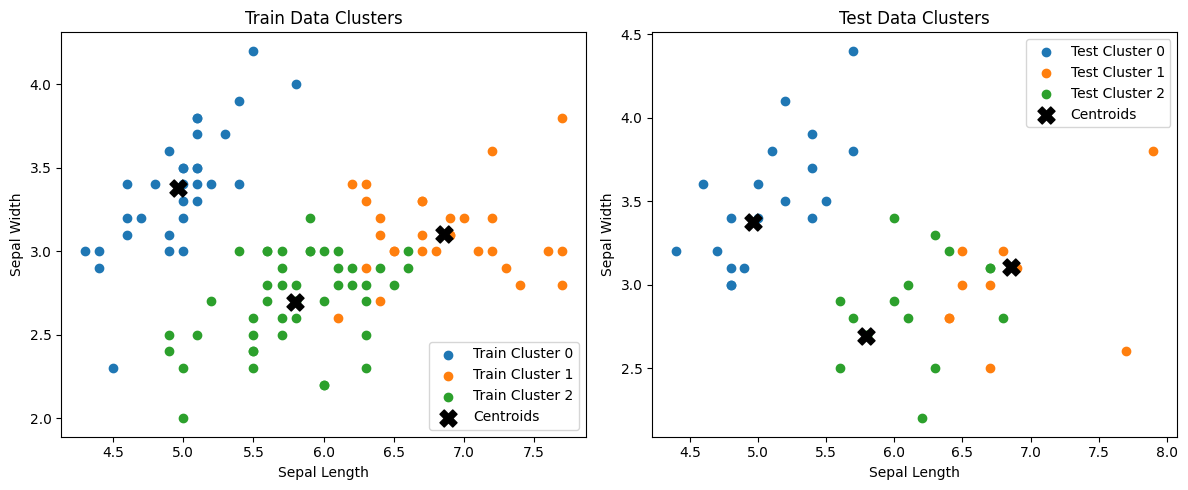

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def manual_kmeans(X, k=3, max_iters=100, tol=1e-4):
    np.random.seed(42)
    # Step 1: Random centroids
    random_indices = np.random.choice(len(X), k, replace=False)
    centroids = X[random_indices]

    for iteration in range(max_iters):
        labels = np.zeros(len(X), dtype=int)
        for i, point in enumerate(X):
            distances = euclidean_distance(point, centroids)
            labels[i] = np.argmin(distances)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return labels, centroids

def assign_clusters(X, centroids):
    labels = np.zeros(len(X), dtype=int)
    for i, point in enumerate(X):
        distances = euclidean_distance(point, centroids)
        labels[i] = np.argmin(distances)
    return labels

# Step 1: Load & split dataset
iris = load_iris()
X = iris.data

X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Step 2: KMeans on training set
k = 3
train_labels, centroids = manual_kmeans(X_train, k=k)

# Step 3: Predict clusters for test set
test_labels = assign_clusters(X_test, centroids)

# Step 4: Count points in each cluster
def print_cluster_counts(name, labels):
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\n{name} Cluster Counts:")
    for cluster_id, count in zip(unique, counts):
        print(f"  Cluster {cluster_id}: {count} points")

print_cluster_counts("Train", train_labels)
print_cluster_counts("Test", test_labels)

# Step 5: Plotting
plt.figure(figsize=(12, 5))

# Train plot
plt.subplot(1, 2, 1)
for i in range(k):
    plt.scatter(X_train[train_labels == i, 0], X_train[train_labels == i, 1], label=f'Train Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=150, label='Centroids')
plt.title("Train Data Clusters")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

# Test plot
plt.subplot(1, 2, 2)
for i in range(k):
    plt.scatter(X_test[test_labels == i, 0], X_test[test_labels == i, 1], label=f'Test Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=150, label='Centroids')
plt.title("Test Data Clusters")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

plt.tight_layout()
plt.show()



========== K = 2 ==========

Train Cluster Counts:
  Cluster 0: 34 points
  Cluster 1: 71 points

Test Cluster Counts:
  Cluster 0: 19 points
  Cluster 1: 26 points


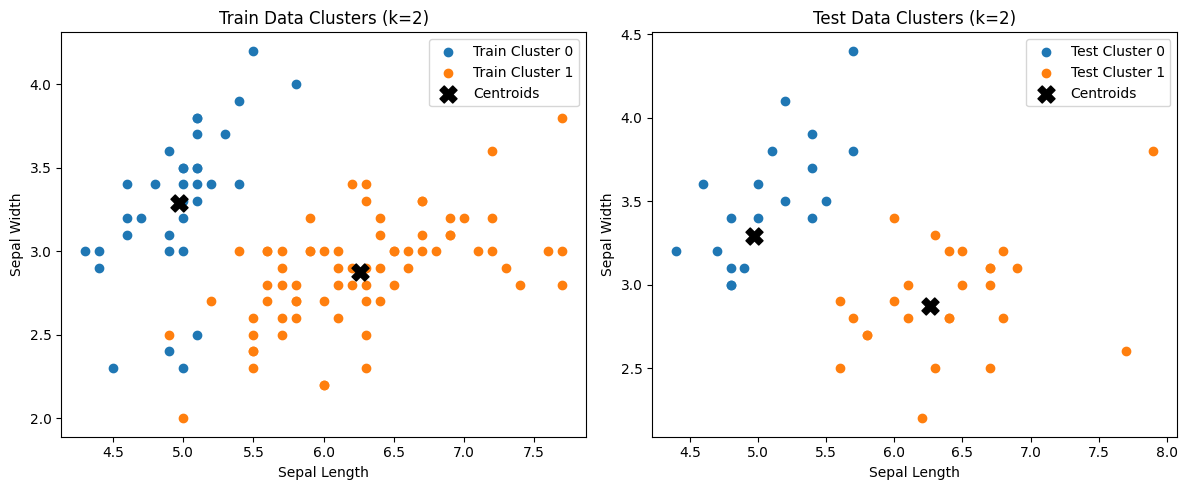


========== K = 3 ==========

Train Cluster Counts:
  Cluster 0: 31 points
  Cluster 1: 29 points
  Cluster 2: 45 points

Test Cluster Counts:
  Cluster 0: 19 points
  Cluster 1: 10 points
  Cluster 2: 16 points


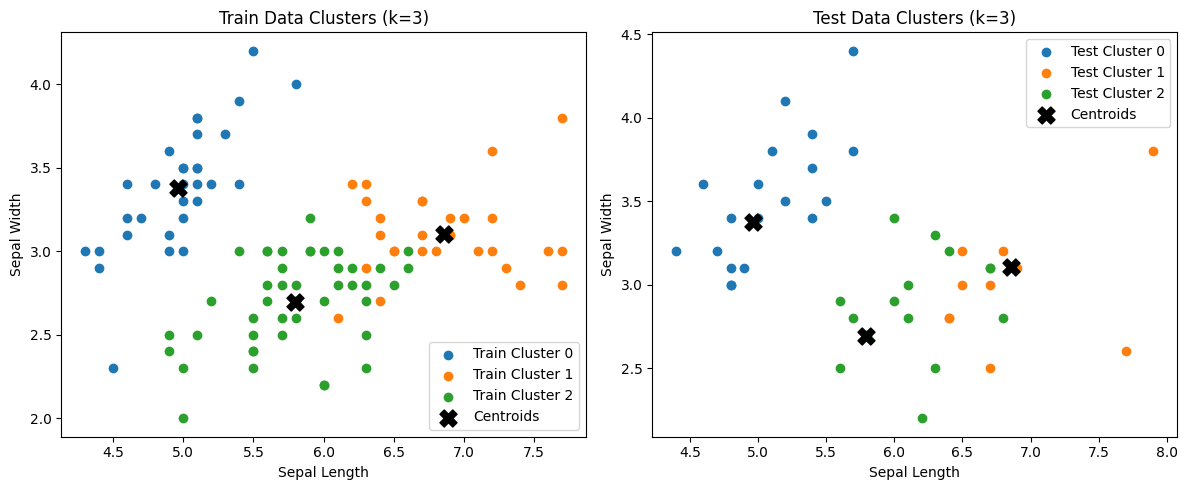


========== K = 4 ==========

Train Cluster Counts:
  Cluster 0: 31 points
  Cluster 1: 18 points
  Cluster 2: 26 points
  Cluster 3: 30 points

Test Cluster Counts:
  Cluster 0: 19 points
  Cluster 1: 6 points
  Cluster 2: 4 points
  Cluster 3: 16 points


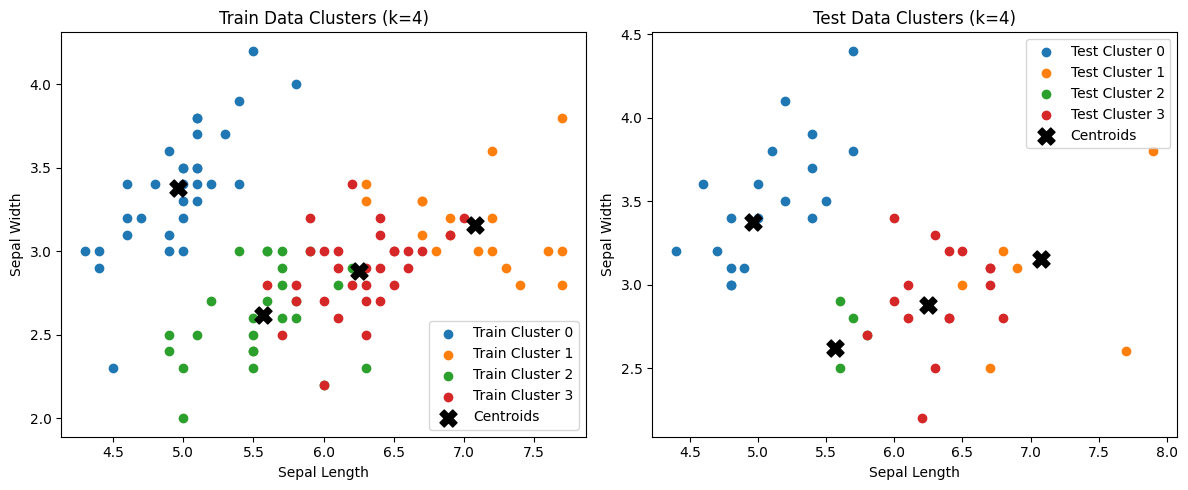

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def manual_kmeans(X, k=3, max_iters=100, tol=1e-4):
    np.random.seed(42)
    random_indices = np.random.choice(len(X), k, replace=False)
    centroids = X[random_indices]

    for iteration in range(max_iters):
        labels = np.zeros(len(X), dtype=int)
        for i, point in enumerate(X):
            distances = euclidean_distance(point, centroids)
            labels[i] = np.argmin(distances)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return labels, centroids

def assign_clusters(X, centroids):
    labels = np.zeros(len(X), dtype=int)
    for i, point in enumerate(X):
        distances = euclidean_distance(point, centroids)
        labels[i] = np.argmin(distances)
    return labels

def print_cluster_counts(name, labels):
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\n{name} Cluster Counts:")
    for cluster_id, count in zip(unique, counts):
        print(f"  Cluster {cluster_id}: {count} points")

# Load dataset & split
iris = load_iris()
X = iris.data
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Try multiple k values
k_values = [2, 3, 4]

for k in k_values:
    print(f"\n========== K = {k} ==========")

    # Train on training set
    train_labels, centroids = manual_kmeans(X_train, k=k)

    # Predict for test set
    test_labels = assign_clusters(X_test, centroids)

    # Print counts
    print_cluster_counts("Train", train_labels)
    print_cluster_counts("Test", test_labels)

    # Plot train and test clusters
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    for i in range(k):
        axes[0].scatter(X_train[train_labels == i, 0], X_train[train_labels == i, 1], label=f'Train Cluster {i}')
    axes[0].scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=150, label='Centroids')
    axes[0].set_title(f"Train Data Clusters (k={k})")
    axes[0].set_xlabel("Sepal Length")
    axes[0].set_ylabel("Sepal Width")
    axes[0].legend()

    for i in range(k):
        axes[1].scatter(X_test[test_labels == i, 0], X_test[test_labels == i, 1], label=f'Test Cluster {i}')
    axes[1].scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=150, label='Centroids')
    axes[1].set_title(f"Test Data Clusters (k={k})")
    axes[1].set_xlabel("Sepal Length")
    axes[1].set_ylabel("Sepal Width")
    axes[1].legend()

    plt.tight_layout()
    plt.show()
